In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

<h1> Input image </h1>

In [2]:
image = cv2.imread('./image/input/uoa4.jpg')

# resize
new_width = 300 
new_height = int(image.shape[0] * (new_width / image.shape[1]))
image = cv2.resize(image, (new_width, new_height))

In [3]:
image.shape

(533, 300, 3)

<h1> show image </h1>

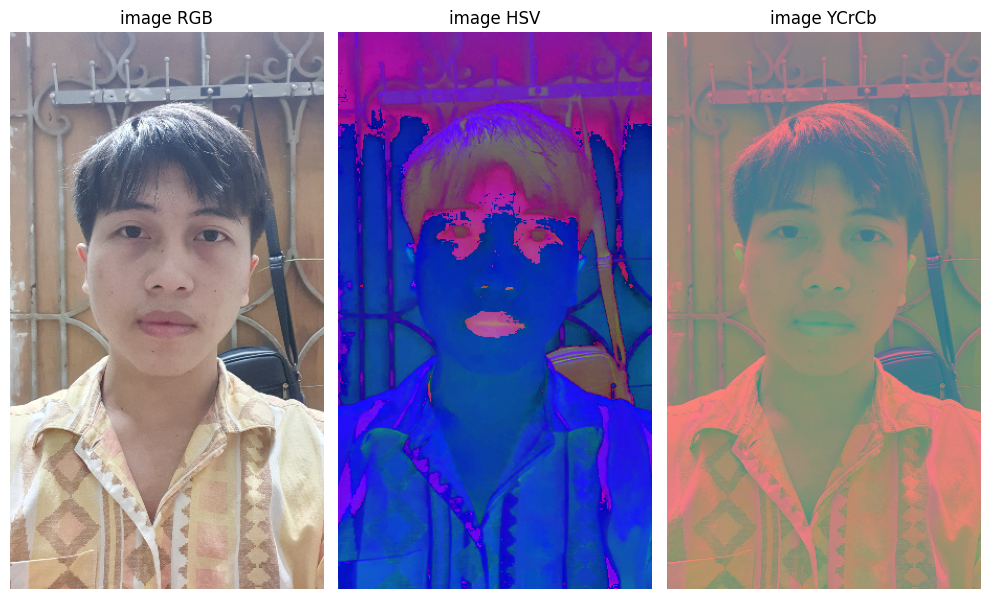

In [4]:

image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_YCrCb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

plt.figure(figsize=(10, 8))
plt.subplot(131)
plt.imshow(image_RGB)
plt.title('image RGB')
plt.axis('off')
plt.subplot(132)
plt.imshow(image_HSV)
plt.title('image HSV')
plt.axis('off')
plt.subplot(133)
plt.imshow(image_YCrCb)
plt.title('image YCrCb')
plt.axis('off')

plt.tight_layout()
plt.show()

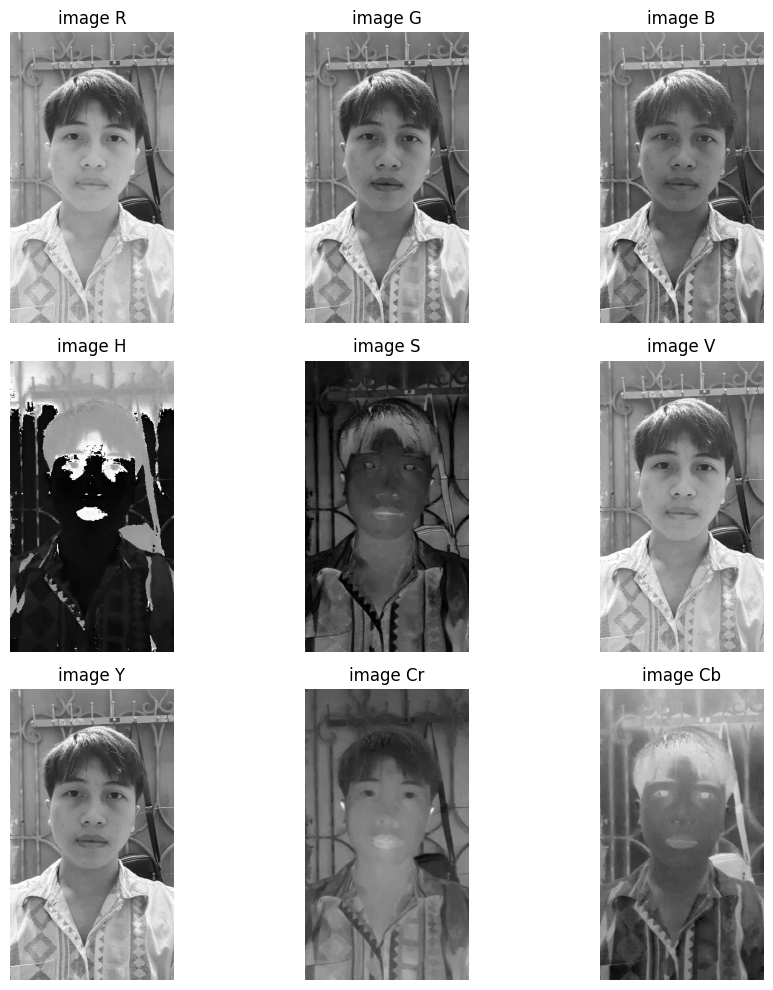

In [5]:

image_R = image_RGB[:, :, 0]
image_G = image_RGB[:, :, 1]
image_B = image_RGB[:, :, 2]

image_H = image_HSV[:, :, 0]
image_S = image_HSV[:, :, 1]
image_V = image_HSV[:, :, 2]

image_Y = image_YCrCb[:, :, 0]
image_Cr = image_YCrCb[:, :, 1]
image_Cb = image_YCrCb[:, :, 2]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

ax[0, 0].imshow(image_R, cmap='gray')
ax[0, 0].set_title('image R')
ax[0, 0].axis('off')

ax[0, 1].imshow(image_G, cmap='gray')
ax[0, 1].set_title('image G')
ax[0, 1].axis('off')

ax[0, 2].imshow(image_B, cmap='gray')
ax[0, 2].set_title('image B')
ax[0, 2].axis('off')

ax[1, 0].imshow(image_H, cmap='gray')
ax[1, 0].set_title('image H')
ax[1, 0].axis('off')

ax[1, 1].imshow(image_S, cmap='gray')
ax[1, 1].set_title('image S')
ax[1, 1].axis('off')

ax[1, 2].imshow(image_V, cmap='gray')
ax[1, 2].set_title('image V')
ax[1, 2].axis('off')

ax[2, 0].imshow(image_Y, cmap='gray')
ax[2, 0].set_title('image Y')
ax[2, 0].axis('off')

ax[2, 1].imshow(image_Cr, cmap='gray')
ax[2, 1].set_title('image Cr')
ax[2, 1].axis('off')

ax[2, 2].imshow(image_Cb, cmap='gray')
ax[2, 2].set_title('image Cb')
ax[2, 2].axis('off')

plt.tight_layout()
plt.show()

In [6]:
def resize_image(image):
    new_width = 300 
    new_height = int(image.shape[0] * (new_width / image.shape[1]))
    image = cv2.resize(image, (new_width, new_height))
    return image

In [15]:
def get_ycrcb_mask(image):
    # convert to YCrCb
    image_ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    # set threshold
    lower_thresh_Y = np.array([25, 135, 85], dtype=np.uint8)
    upper_thresh_Y = np.array([255, 180, 135], dtype=np.uint8)

    # create mask
    msk_ycrcb = cv2.inRange(image_ycrcb, lower_thresh_Y, upper_thresh_Y)
    
    # morphology
    kernel = np.ones((4, 3), np.uint8)
    # msk_ycrcb_morpho = cv2.erode(msk_ycrcb, kernel, iterations=4)
    msk_ycrcb_morpho = cv2.morphologyEx(msk_ycrcb, cv2.MORPH_ERODE, kernel=kernel, iterations=4)
    # msk_ycrcb_morpho = cv2.morphologyEx(msk_ycrcb, cv2.MORPH_OPEN, kernel=kernel, iterations=1)
    
    return msk_ycrcb, msk_ycrcb_morpho
    

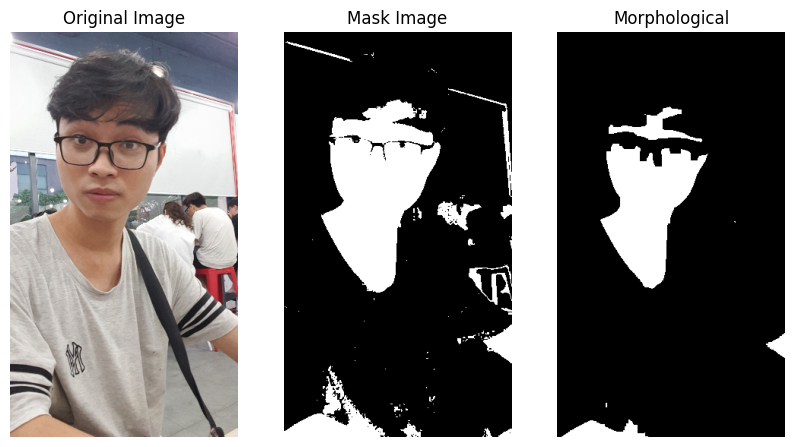

In [16]:
image = cv2.imread('./image/input/dada.jpg')
image = resize_image(image)
mask_ycrcb = get_ycrcb_mask(image)

# Hiển thị ảnh gốc và mask
plt.figure(figsize=(10, 8))
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(mask_ycrcb[0], cmap='gray')
plt.title('Mask Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(mask_ycrcb[1], cmap='gray')
plt.title('Morphological')
plt.axis('off')
plt.show()


In [17]:
def get_contour_coord(image):
    mask_img = get_ycrcb_mask(image)[1]
    
    contours, _ = cv2.findContours(mask_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_contour = max(contours, key=cv2.contourArea)
 
    # get coord contour
    x, y, w, h = cv2.boundingRect(max_contour)

    return x, y, w, h, max_contour

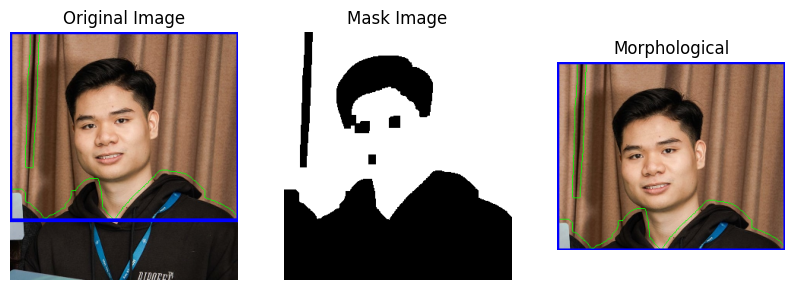

In [18]:
# Đọc ảnh từ file
image = cv2.imread('./image/input/vaa2.jpg')
image = resize_image(image)
mask_ycrcb = get_ycrcb_mask(image)[1]
x, y, w, h, max_contour = get_contour_coord(image)

# draw contour and rect
cv2.drawContours(image, [max_contour], -1, (0, 255, 0), 1)
cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 3)
    
# Hiển thị ảnh gốc và mask
plt.figure(figsize=(10, 8))
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(mask_ycrcb, cmap='gray')
plt.title('Mask Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(image[y:y + h, x:x + w], cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Morphological')
plt.axis('off')
plt.show()


In [19]:
def detect_face_with_template(image, template):
    mask_ycrcb = get_ycrcb_mask(image)[1]
    x, y, w, h, _ = get_contour_coord(image)
    
    # template matching
    template = cv2.resize(template, (130, 130))
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    roi = mask_ycrcb[y:y + h, x:x + w]
    result = cv2.matchTemplate(roi, template, cv2.TM_CCORR_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    # Draw rect around face detect
    face_detect = np.copy(image)
    top_left = (max_loc[0] + x, max_loc[1] + y)
    bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])
    cv2.rectangle(face_detect, top_left, bottom_right, (0, 0, 255), 2)

    face_crop = image[(max_loc[1] + y) : (top_left[1] + template.shape[0]), (max_loc[0] + x) : (top_left[0] + template.shape[1]), :]

    return face_detect, face_crop
    
    

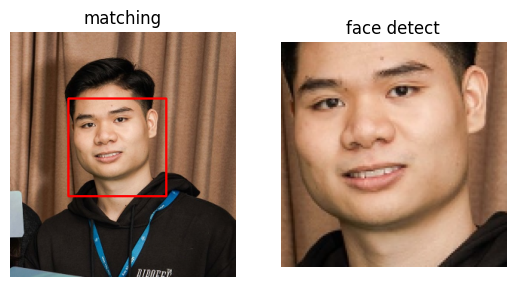

In [20]:
img = cv2.imread('./image/input/vaa2.jpg')
img = resize_image(img)

template = cv2.imread('./image/input/template2.png')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(detect_face_with_template(img, template)[0], cv2.COLOR_BGR2RGB))
plt.title('matching')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(detect_face_with_template(img, template)[1], cv2.COLOR_BGR2RGB))
plt.title('face detect')
plt.axis('off')

plt.show()


# step by step

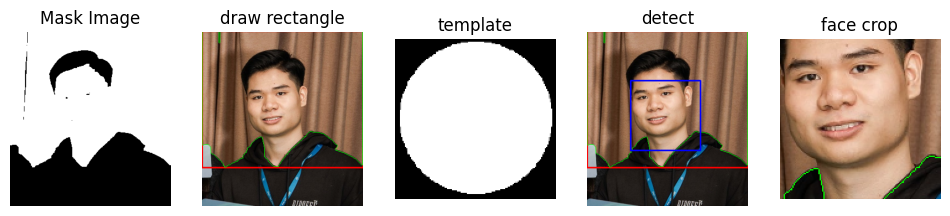

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ file
img = cv2.imread('./image/input/vaa2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

new_width = 300  # Kích thước mới theo chiều rộng
new_height = int(img.shape[0] * (new_width / img.shape[1]))
img = cv2.resize(img, (new_width, new_height))
# img = cv2.resize(img, (72, 128), interpolation=cv2.INTER_AREA)

# Chuyển đổi không gian màu sang YCrCb
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

# Hiển thị histogram của kênh Y (độ sáng)
hist_Y = cv2.calcHist([img_ycrcb], [0], None, [256], [0, 256])

# Tính ngưỡng để xác định khoảng độ sáng của vùng da mặt
threshold_Y = 0.5  # Giả sử 50% giá trị cao nhất
max_Y_index = np.argmax(hist_Y)
lower_Y_thresh = max_Y_index * threshold_Y
upper_Y_thresh = 255

# Định nghĩa khoảng ngưỡng màu trong không gian YCrCb
lower_thresh_Y = np.array([int(lower_Y_thresh), 135, 85], dtype=np.uint8)
upper_thresh_Y = np.array([255, 180, 135], dtype=np.uint8)

# Tạo mask dựa trên khoảng ngưỡng màu
msk_ycrcb = cv2.inRange(img_ycrcb, lower_thresh_Y, upper_thresh_Y)

# Áp dụng morphological transformations để loại bỏ nhiễu và kết hợp vùng màu da
kernel = np.ones((4, 5), np.uint8)
# msk_ycrcb = cv2.erode(msk_ycrcb, kernel, iterations=4)
# msk_ycrcb = cv2.dilate(src=msk_ycrcb, kernel=kernel)

msk_ycrcb = cv2.morphologyEx(msk_ycrcb, cv2.MORPH_OPEN, kernel)
# msk_ycrcb = cv2.morphologyEx(msk_ycrcb, cv2.MORPH_CLOSE, kernel)

# Tìm contours và chọn contour có diện tích lớn nhất
contours, _ = cv2.findContours(msk_ycrcb, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
max_contour = max(contours, key=cv2.contourArea)

# Lấy tọa độ và kích thước hình chữ nhật bao quanh contour lớn nhất
x, y, w, h = cv2.boundingRect(max_contour)

# Vẽ khung hình chữ nhật trên ảnh gốc
cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
cv2.drawContours(img, [max_contour], -1, (0, 255, 0), 1)

# Thực hiện template matching chỉ trong phạm vi khung đã vẽ
template = cv2.imread('./image/input/template2.png')
template = cv2.resize(template, (130, 130))
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

roi = msk_ycrcb[y:y + h, x:x + w]
result = cv2.matchTemplate(roi, template, cv2.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Vẽ hình chữ nhật xung quanh khuôn mặt dự đoán
face_detect = np.copy(img)
top_left = (max_loc[0] + x, max_loc[1] + y)
bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])
cv2.rectangle(face_detect, top_left, bottom_right, (0, 0, 255), 2)

face_crop = img[(max_loc[1] + y) : (top_left[1] + template.shape[0]), (max_loc[0] + x) : (top_left[0] + template.shape[1]), :]

# Hiển thị ảnh gốc và mask
plt.figure(figsize=(12, 10))
plt.subplot(1, 5, 1)
plt.imshow(msk_ycrcb, cmap='gray')
plt.title('Mask Image')
plt.axis('off')

plt.subplot(1, 5, 2) 
plt.imshow(img)
plt.title('draw rectangle')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(template, cmap='gray')
plt.title('template')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(face_detect)
plt.title('detect')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(face_crop)
plt.title('face crop')
plt.axis('off')

plt.show()


# Plot scatter

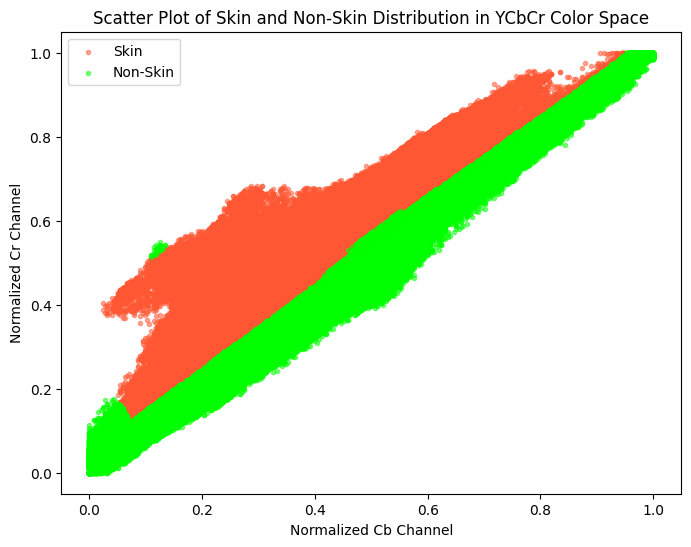

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ file
img = cv2.imread('./image/input/vaa.jpg')

# Chuyển đổi không gian màu sang YCrCb
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

# Hiển thị histogram của kênh Y (độ sáng)
hist_Y = cv2.calcHist([img_ycrcb], [0], None, [256], [0, 256])

# Tính ngưỡng để xác định khoảng độ sáng của vùng da mặt
threshold_Y = 0.5  # Giả sử 50% giá trị cao nhất
max_Y_index = np.argmax(hist_Y)
lower_Y_thresh = max_Y_index * threshold_Y
upper_Y_thresh = 255

# Định nghĩa khoảng ngưỡng màu trong không gian YCrCb cho màu da
lower_thresh_Y = np.array([int(lower_Y_thresh), 135, 85], dtype=np.uint8)
upper_thresh_Y = np.array([255, 180, 135], dtype=np.uint8)

# Tạo mask dựa trên khoảng ngưỡng màu cho màu da
msk_ycrcb_skin = cv2.inRange(img_ycrcb, lower_thresh_Y, upper_thresh_Y)

# Tạo mask ngược lại cho vùng không phải màu da
msk_ycrcb_non_skin = cv2.bitwise_not(msk_ycrcb_skin)

# Tách ảnh gốc theo mask
result_img_skin = cv2.bitwise_and(img, img, mask=msk_ycrcb_skin)
result_img_non_skin = cv2.bitwise_and(img, img, mask=msk_ycrcb_non_skin)

# Tách các kênh màu
y_skin, cb_skin, cr_skin = cv2.split(result_img_skin)
y_non_skin, cb_non_skin, cr_non_skin = cv2.split(result_img_non_skin)

# Chuẩn hóa giá trị Cb và Cr về khoảng [0, 1]
cb_skin_normalized = cb_skin / 255.0
cr_skin_normalized = cr_skin / 255.0
cb_non_skin_normalized = cb_non_skin / 255.0
cr_non_skin_normalized = cr_non_skin / 255.0

# Mã màu cho vùng da và vùng không phải da
scatter_color_skin = '#FF5733'  # Mã màu hex của màu da
scatter_color_non_skin = '#00FF00'  # Mã màu hex của màu không phải da

# Vẽ biểu đồ phân tán
plt.figure(figsize=(8, 6))

# Vùng màu da
plt.scatter(cb_skin_normalized.flatten(), cr_skin_normalized.flatten(), marker='.', color=scatter_color_skin, alpha=0.5, label='Skin')

# Vùng không phải màu da
plt.scatter(cb_non_skin_normalized.flatten(), cr_non_skin_normalized.flatten(), marker='.', color=scatter_color_non_skin, alpha=0.5, label='Non-Skin')

plt.title('Scatter Plot of Skin and Non-Skin Distribution in YCbCr Color Space')
plt.xlabel('Normalized Cb Channel')
plt.ylabel('Normalized Cr Channel')
plt.legend()
plt.show()
